# 06. Градиентный спуск

Во многих задачах машинного обучения мы ищем параметры модели, при которых **функция потерь минимальна**. Аналитическую формулу (как в МНК) удаётся выписать не всегда. **Градиентный спуск** — это итеративный способ приближаться к минимуму «шаг за шагом».

В этом блокноте:
- интуиция: спуск с горы в тумане;
- что такое градиент и зачем он нужен;
- правило обновления параметров;
- наглядный пример на функции одной переменной;
- пример в 2D и связь с линейной регрессией.

## 1. Интуиция: спуск с горы

Представьте, что вы стоите на склоне холма в густом тумане и хотите **спуститься вниз** (достичь самой низкой точки). Вы не видите весь рельеф, но под ногами чувствуете уклон.

- **Направление спуска** — туда, где земля быстрее всего понижается (направление **антиградиента**).
- **Размер шага** — насколько сильно шагнуть. Слишком большой шаг — можно «перелететь» минимум; слишком маленький — спуск будет очень долгим.

**Градиентный спуск** делает то же самое для функции потерь $L(w)$: мы многократно сдвигаем параметры $w$ в направлении **убывания** $L$, пока не окажемся близко к минимуму.

## 2. Градиент и правило обновления

**Градиент** функции $L(w)$ — это вектор, каждая компонента которого есть **частная производная** $L$ по соответствующей координате $w_j$:

$$
\nabla L(w) = \left( \frac{\partial L}{\partial w_1}, \frac{\partial L}{\partial w_2}, \dots \right)^T.
$$

Градиент в точке $w$ указывает направление **наибыстрейшего роста** функции. Значит, чтобы функцию **уменьшать**, нужно двигаться в направлении **минус градиента**.

**Правило обновления** на каждом шаге $t$:

$$
w^{(t+1)} = w^{(t)} - \eta \cdot \nabla L(w^{(t)}).
$$

Здесь $\eta$ (эта) — **скорость обучения** (learning rate), то есть размер шага. Чем больше $\eta$, тем больше шаг; слишком большой $\eta$ может привести к «рассинхронизации» и отсутствию сходимости к минимуму.

## 3. Пример: минимизация функции одной переменной

Рассмотрим простую функцию $L(w) = (w - 2)^2 + 1$. Её минимум в точке $w^* = 2$, $L(2) = 1$.

Производная: $\frac{dL}{dw} = 2(w - 2)$. Правило обновления: $w_{\text{new}} = w - \eta \cdot 2(w - 2)$.

Реализуем несколько шагов градиентного спуска и посмотрим, как $w$ приближается к 2.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def L(w):
    return (w - 2) ** 2 + 1

def grad_L(w):
    return 2 * (w - 2)

# Градиентный спуск
eta = 0.15      # скорость обучения
w = -1.0        # начальная точка
n_steps = 20

history_w = [w]
history_L = [L(w)]

for _ in range(n_steps):
    w = w - eta * grad_L(w)
    history_w.append(w)
    history_L.append(L(w))

print("Начальное w:", history_w[0], "-> Конечное w:", history_w[-1])
print("Начальное L(w):", history_L[0], "-> Конечное L(w):", history_L[-1])

Начальное w: -1.0 -> Конечное w: 1.9976062320110715
Начальное L(w): 10.0 -> Конечное L(w): 1.0000057301251848


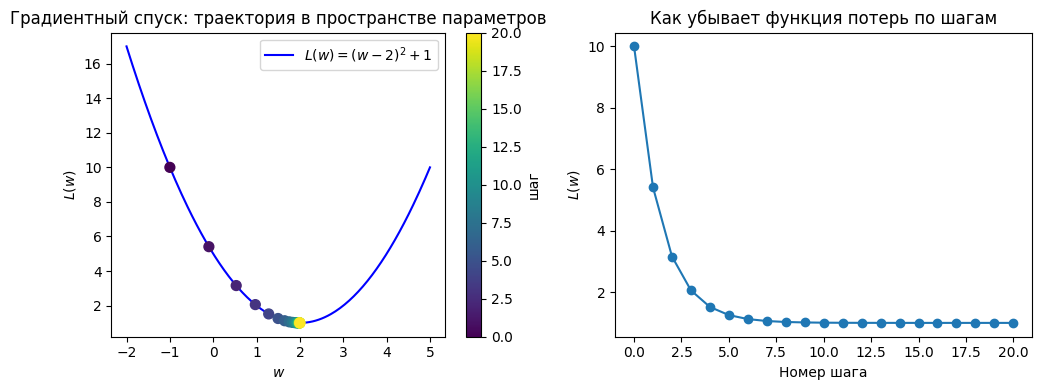

In [2]:
# Визуализация: функция L(w) и траектория спуска

w_plot = np.linspace(-2, 5, 200)
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(w_plot, L(w_plot), color="blue", label="$L(w) = (w-2)^2 + 1$")
sc = plt.scatter(history_w, history_L, c=range(len(history_w)), cmap="viridis", s=50, zorder=5)
plt.xlabel("$w$")
plt.ylabel("$L(w)$")
plt.title("Градиентный спуск: траектория в пространстве параметров")
plt.legend()
plt.colorbar(sc, label="шаг")

plt.subplot(1, 2, 2)
plt.plot(history_L, "o-")
plt.xlabel("Номер шага")
plt.ylabel("$L(w)$")
plt.title("Как убывает функция потерь по шагам")

plt.tight_layout()
plt.show()

## 4. Влияние скорости обучения $\eta$

- **Маленький $\eta$**: шаги маленькие, сходимость медленная, но стабильная.
- **Слишком большой $\eta$**: можно «перепрыгнуть» минимум и начать колебаться или уйти в сторону.

Ниже сравниваем два значения $\eta$ на той же функции.

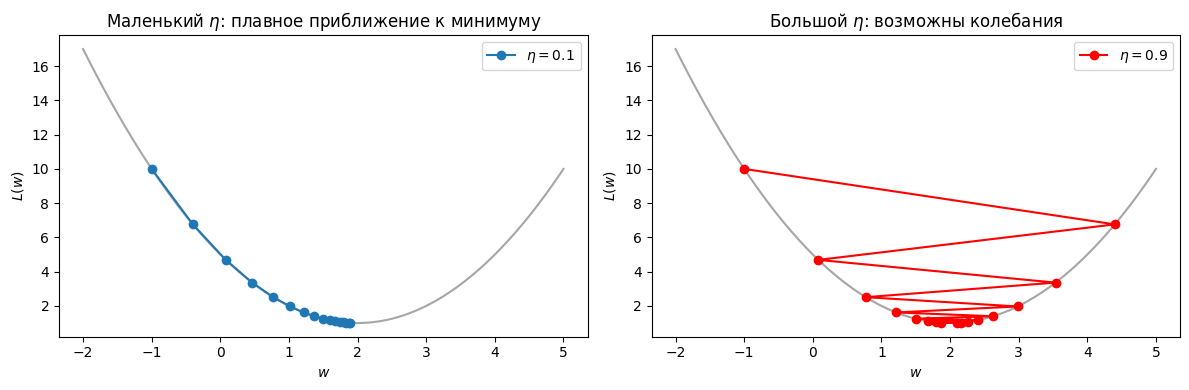

In [3]:
def gradient_descent(eta, w0=-1.0, n_steps=15):
    w = w0
    history = [w]
    for _ in range(n_steps):
        w = w - eta * grad_L(w)
        history.append(w)
    return history

path_small = gradient_descent(eta=0.1)
path_large = gradient_descent(eta=0.9)

w_plot = np.linspace(-2, 5, 200)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(w_plot, L(w_plot), color="gray", alpha=0.7)
plt.plot(path_small, [L(w) for w in path_small], "o-", label="$\\eta = 0.1$")
plt.xlabel("$w$")
plt.ylabel("$L(w)$")
plt.title("Маленький $\\eta$: плавное приближение к минимуму")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(w_plot, L(w_plot), color="gray", alpha=0.7)
plt.plot(path_large, [L(w) for w in path_large], "o-", color="red", label="$\\eta = 0.9$")
plt.xlabel("$w$")
plt.ylabel("$L(w)$")
plt.title("Большой $\\eta$: возможны колебания")
plt.legend()

plt.tight_layout()
plt.show()

## 5. Связь с линейной регрессией

В линейной регрессии мы минимизируем MSE:

$$
L(w) = \frac{1}{n} \sum_{i=1}^n (y^{(i)} - (w_0 + w^T x^{(i)}))^2.
$$

Можно выписать градиент $L$ по $w$ и применять градиентный спуск. Так работают многие алгоритмы (в том числе логистическая регрессия и нейронные сети): на каждом шаге считают градиент по текущим данным и делают шаг обновления.

Для MSE при определённых условиях градиентный спуск с подходящим $\eta$ сходится к тому же решению, что и аналитическая формула МНК. В более сложных моделях аналитической формулы нет, и градиентный спуск (или его варианты: SGD, Adam и т.д.) — основной способ обучения.

## 6. Краткое резюме

- **Градиент** $\nabla L(w)$ показывает направление наибыстрейшего **роста** функции.
- Чтобы **уменьшать** $L$, обновляем параметры в направлении **минус градиента**: $w \leftarrow w - \eta \nabla L(w)$.
- **Скорость обучения** $\eta$ задаёт размер шага; её подбирают на практике (слишком большой — не сходится, слишком маленький — долго).
- Идея одна и та же для любой дифференцируемой функции потерь: линейная регрессия, логистическая регрессия, нейронные сети.

## 7. Задания

1. Измените начальную точку $w$ в первом примере (например, $w = 5$) и убедитесь, что градиентный спуск всё равно приводит к $w \approx 2$.
2. Подберите такое $\eta$, при котором траектория «перескакивает» минимум и колеблется. Что происходит с $L(w)$ по шагам?
3. Попробуйте функцию двух переменных $L(w_1, w_2) = w_1^2 + w_2^2$ (минимум в $(0, 0)$). Реализуйте градиентный спуск для вектора $w = (w_1, w_2)$ и постройте траекторию на плоскости $(w_1, w_2)$.

При w_start=5 после 20 шагов: w = 2.002393767988928 ≈ 2


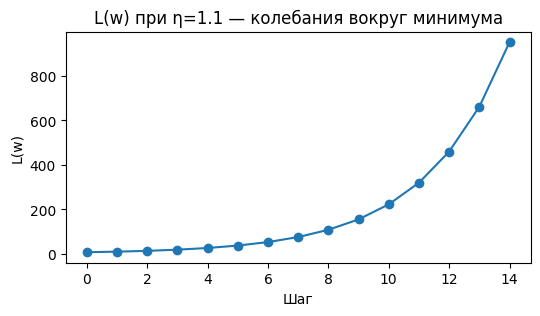

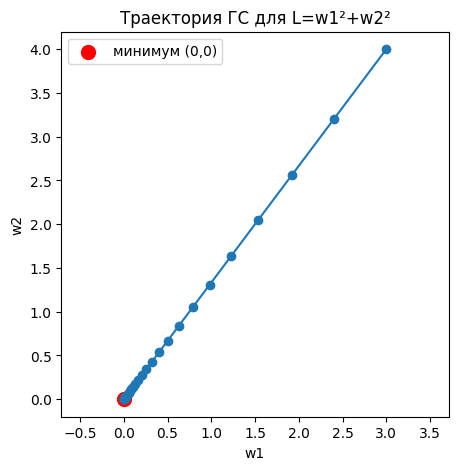

In [4]:
# Решения заданий
# 1. Начальная точка w = 5 — градиентный спуск всё равно приводит к w ≈ 2
w = 5.0
for _ in range(20):
    w = w - eta * grad_L(w)
print("При w_start=5 после 20 шагов: w =", w, "≈ 2")

# 2. Большой η — перескок минимума, колебания (например η = 1.1)
w2, hist = 0.0, []
eta_big = 1.1
for _ in range(15):
    w2 = w2 - eta_big * grad_L(w2)
    hist.append(L(w2))
plt.figure(figsize=(6, 3))
plt.plot(hist, 'o-')
plt.xlabel("Шаг")
plt.ylabel("L(w)")
plt.title("L(w) при η=1.1 — колебания вокруг минимума")
plt.show()

# 3. Двумерный случай L(w1,w2) = w1^2 + w2^2, минимум (0,0)
def L2(w1, w2): return w1**2 + w2**2
def grad_L2(w1, w2): return np.array([2*w1, 2*w2])
w1, w2 = 3.0, 4.0
eta3 = 0.1
path = [(w1, w2)]
for _ in range(30):
    g = grad_L2(w1, w2)
    w1, w2 = w1 - eta3*g[0], w2 - eta3*g[1]
    path.append((w1, w2))
path = np.array(path)
plt.figure(figsize=(5, 5))
plt.plot(path[:, 0], path[:, 1], 'o-')
plt.scatter([0], [0], c='red', s=100, label='минимум (0,0)')
plt.xlabel("w1"); plt.ylabel("w2")
plt.legend(); plt.title("Траектория ГС для L=w1²+w2²")
plt.axis('equal'); plt.show()